In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logistic_regression = LogisticRegression()

In [99]:
data_mush = 'secondary_data.csv'
data = pd.read_csv(data_mush, sep=';')

In [100]:
data.shape

(61069, 21)

In [101]:
data.head(7)

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   
5     p         15.34         x           g         o                    f   
6     p         14.85         f           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   
5               e          NaN          w        17.84  ...          s   
6               e          NaN          w        17.71  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   
5            y          w         u          w        t         p   
6            y          w         u          w        t         g   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  
5               NaN       d      u  
6               NaN       d      w  

[7 rows x 21 columns]

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [103]:
((data.isnull().sum() / data.shape[0]) * 100).round(2).sort_values(ascending = False)

veil-type               94.80
spore-print-color       89.60
veil-color              87.86
stem-root               84.39
stem-surface            62.43
gill-spacing            41.04
cap-surface             23.12
gill-attachment         16.18
ring-type                4.05
season                   0.00
cap-diameter             0.00
cap-shape                0.00
cap-color                0.00
does-bruise-or-bleed     0.00
stem-width               0.00
gill-color               0.00
stem-height              0.00
habitat                  0.00
stem-color               0.00
has-ring                 0.00
class                    0.00
dtype: float64

In [104]:
data.dropna(axis=1, inplace= True)

In [105]:
((data.isnull().sum() / data.shape[0]) * 100).round(2).sort_values(ascending = False)

season                  0.0
habitat                 0.0
has-ring                0.0
stem-color              0.0
stem-width              0.0
stem-height             0.0
gill-color              0.0
does-bruise-or-bleed    0.0
cap-color               0.0
cap-shape               0.0
cap-diameter            0.0
class                   0.0
dtype: float64

In [106]:
data.head(5)

class  cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0     p         15.26         x         o                    f          w   
1     p         16.60         x         o                    f          w   
2     p         14.07         x         o                    f          w   
3     p         14.17         f         e                    f          w   
4     p         14.64         x         o                    f          w   

   stem-height  stem-width stem-color has-ring habitat season  
0        16.95       17.09          w        t       d      w  
1        17.99       18.19          w        t       d      u  
2        17.80       17.74          w        t       d      w  
3        15.77       15.98          w        t       d      w  
4        16.53       17.20          w        t       d      w

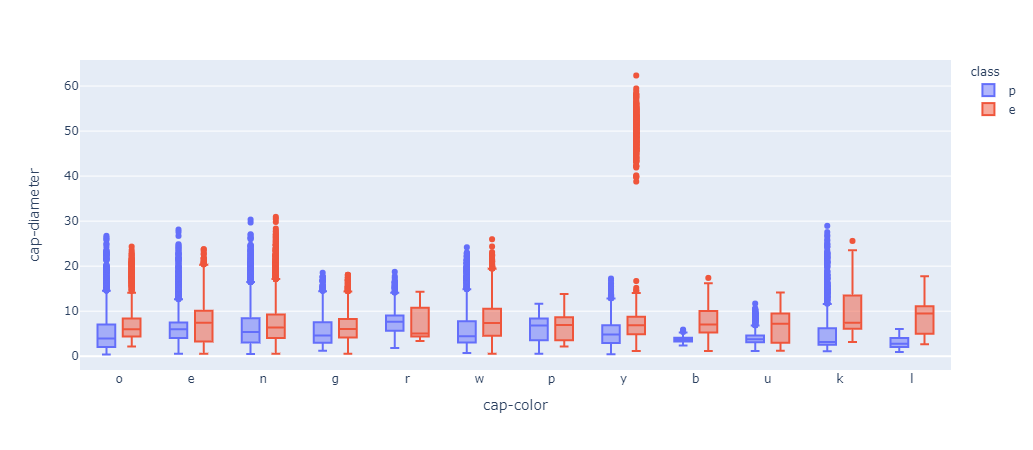

In [107]:
import plotly.express as px

fig = px.box(data, x="cap-color", y="cap-diameter", color = 'class')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

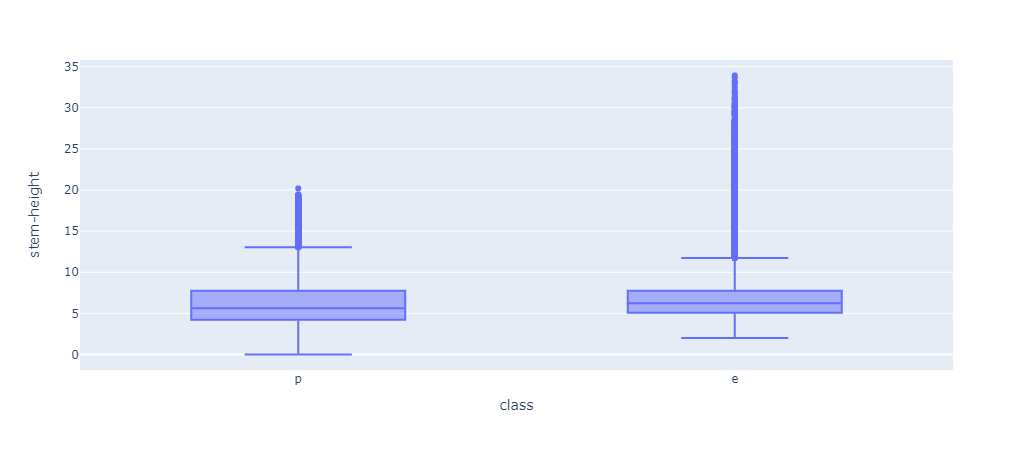

In [108]:
fig = px.box(data, x="class", y="stem-height")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

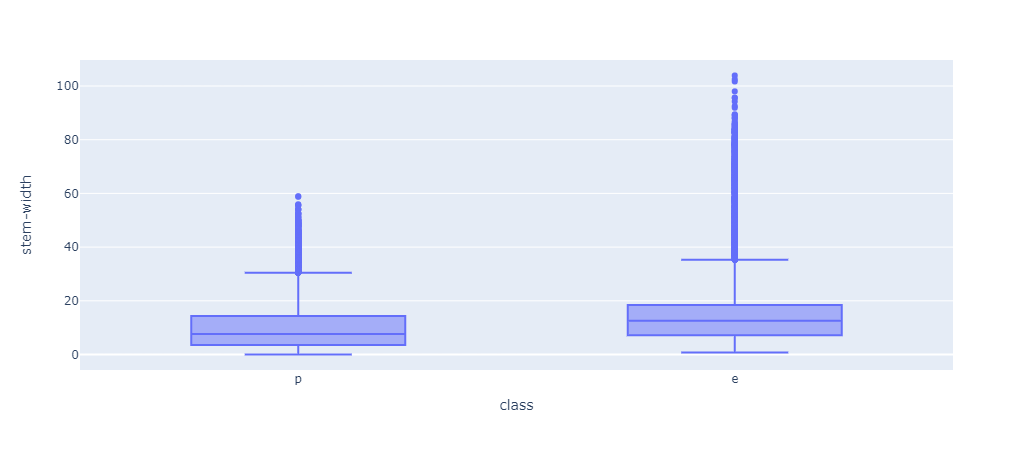

In [109]:
fig = px.box(data, x="class", y="stem-width")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [110]:
data['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [111]:
data_model = pd.get_dummies(data, drop_first = True)

In [112]:
data.head(5)

class  cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0     p         15.26         x         o                    f          w   
1     p         16.60         x         o                    f          w   
2     p         14.07         x         o                    f          w   
3     p         14.17         f         e                    f          w   
4     p         14.64         x         o                    f          w   

   stem-height  stem-width stem-color has-ring habitat season  
0        16.95       17.09          w        t       d      w  
1        17.99       18.19          w        t       d      u  
2        17.80       17.74          w        t       d      w  
3        15.77       15.98          w        t       d      w  
4        16.53       17.20          w        t       d      w

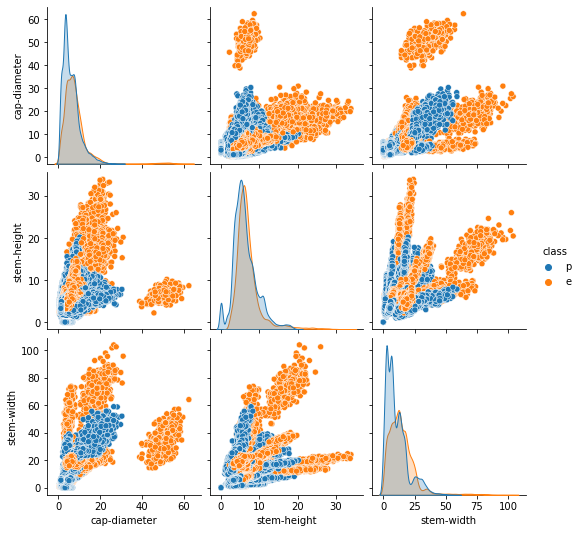

In [113]:
sns.pairplot(data, hue='class')

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

X = data_model.drop(columns=['class_p'])
y = data_model['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [115]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)

knn = KNeighborsClassifier()

model = knn.fit(X_train, y_train)

k_range = list(range(1,30))
scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    cv_scores = cross_val_score(knn, X_test, y_test, cv = kf)
    scores.append(np.mean(cv_scores))

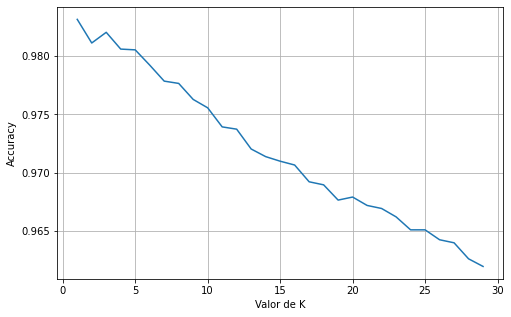

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)
y_train.mean(), y_test.mean()

(0.5549223816073885, 0.5548860361540476)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

iteraciones  = []
scores = []

for i in range(0, 150):
    i += 10
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train, y_train)
    iteraciones.append(i)
    cv_scores = cross_val_score(lr, X_test, y_test, cv = kf)
    scores.append(np.mean(cv_scores))

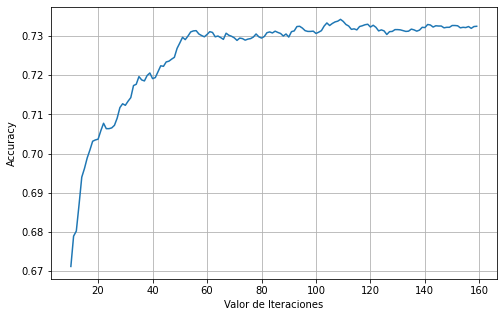

In [119]:
plt.figure(figsize = (8,5))
plt.plot(iteraciones, scores)
plt.xlabel('Valor de Iteraciones'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [120]:
lr = LogisticRegression(max_iter=110)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=110)

In [121]:
accuracy_score(y_test, lr.predict(X_test))

0.7355907780979827

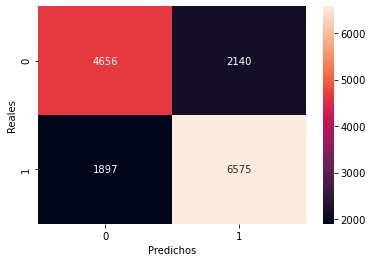

In [122]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt='4d');
plt.xlabel('Predichos');
plt.ylabel('Reales');

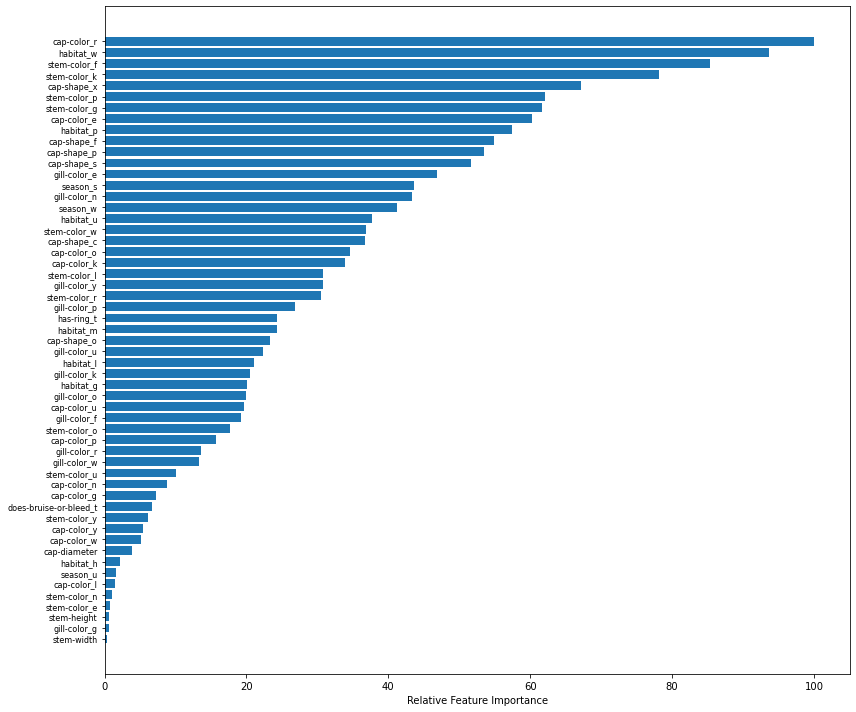

In [123]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = (np.arange(sorted_idx.shape[0]) + .5)

featfig = plt.figure(figsize = (12,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

In [124]:
y_pred = clf.predict(X_test)

ValueError: X has 55 features per sample; expecting 53

In [ ]:
# Ajustamos el modelo
logistic_regression.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = logistic_regression.predict(X_train_scaled)
y_test_pred = logistic_regression.predict((X_test)) 
# Notar que debemos escalar los datos de testeo antes de realizar predicciones

In [ ]:
# Elaboramos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)


In [ ]:
print(sum(y_train_pred == 1))
print(sum(y_test_pred ==1)) 


In [ ]:
from sklearn.metrics import accuracy_score
print(f"El valor de Accuracy es {round(accuracy_score(y_test, y_test_pred), 3)}")

In [ ]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
print(f"El valor de True Positives es {TP}")
print(f"El valor de True Negatives es {TN}")
print(f"El valor de False Positives es {FP}")
print(f"El valor de False Negatives es {FN}")      

In [ ]:
#los scores que siguen se calcularon manualmente para ver las fórmulas y la relación entre TP, FP, TN y FN


Precision = round((TP/(TP+FP)), 3)
print(f"El score de Precisión es {Precision}")

In [ ]:
Recall = round((TP/(TP+FN)), 3)
print(f"El score de Recall es {Recall}")

In [ ]:
Specificity = round((TN/(TN+FP)), 3)
print(f"El score de Specificity es {Specificity}")

In [ ]:
F1 = round((2 *TP/(2* TP + FP + FN)), 3)
print(f"El F1 Score es {F1}")

In [ ]:
pd.Series(y_test_pred).unique() 

In [ ]:
pd.Series(y_test_pred).value_counts() 

In [ ]:
print(1 - accuracy_score(y_test, y_test_pred))

In [ ]:
y_pred_proba = clf.predict_proba(X_test)
display(y_pred_proba.shape, y_pred_proba)

In [ ]:
pd.Series(y_pred_proba[:,1]>=0.5).astype(int).value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de dejar la empresa')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

In [ ]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [ ]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))